In [54]:
import numpy as np
import random
# np.random.seed(20)
random.seed(20)
import math
import matplotlib.pyplot as  plt

In [164]:
def get_card():
#     card = random.choice(range(1,14))
#     card = min(card, 10)
#     if card == 1:
#         card = 11
    card = random.choices(range(2, 12), weights=[1 / 13] * 8 + [4 / 13] + [1 / 13])[0]
    return card


In [178]:

def play_1turn(player_sum,dealer_card1):
    global state_value_pair
    global ACTION_STICK,ACTION_HIT,policy
    player_hist_state = []
    # action = policy[player_sum - 11, dealer_card1 - 2]
    # state = (player_sum, dealer_card1, action)
    # player_hist_state = [state]
    #
    # if player_sum == 21:
    #     action = ACTION_STICK
    # while action:
    #     card = get_card()
    #     player_sum += card
    #     if player_sum > 21:
    #         break
    #     state = (player_sum,dealer_card1,action)
    #     player_hist_state.append(state)
    #     action = policy[player_sum - 11, dealer_card1 - 2]
    action = random.choice([ACTION_STICK,ACTION_HIT])
    state = (player_sum,dealer_card1,action)
    player_hist_state.append(state)
    while action:
        card = get_card()
        player_sum += card
        
        if player_sum > 21:
            return state, -1, player_hist_state
        
        state = (player_sum,dealer_card1,action)
        player_hist_state.append(state)
        action = policy[player_sum - 11,dealer_card1 - 2]






#     dealer_card2 = get_card()
#     dealer_sum = dealer_card1 + dealer_card2
    dealer_sum = dealer_card1

    while dealer_sum < 18:
        card = get_card()
        dealer_sum += card

    if player_sum > 21:
        return state,-1,player_hist_state
    
    elif dealer_sum == player_sum:
        reward = 0
    # elif (dealer_sum > 21) or (player_sum > dealer_sum):
    elif dealer_sum > 21 or player_sum > dealer_sum:
        reward = 1
    elif player_sum < dealer_sum:
        reward = -1
    return state,reward,player_hist_state


In [179]:

gamma = 1
policy = np.zeros((11,10))
state_action_value = np.zeros((11,10,2))
Return = {}
state_value_pair = np.zeros((11,10,2))
ACTION_STICK = int(0)
ACTION_HIT = int(1)
EPISODE = 100000

for i in range(11):
    for j in range(10):
        policy[i, j] = random.choice([ACTION_HIT,ACTION_STICK])


In [180]:

'''Black Jack of MCES '''
from tqdm import tqdm
for _ in tqdm(range(EPISODE)):
    # player_sum = np.random.choice(range(11, 22))
    # dealer_card1 = get_card()
    player_sum,dealer_card1 = random.choice([(s1, s2) for s1 in range(11, 22) for s2 in range(2, 12)])
    # dealer_card1 = np.random.choice(range(2, 12))
    cur_state, cur_reward,player_trajectory = play_1turn(player_sum, dealer_card1)
    G = 0
    for ix in range(len(player_trajectory)-1,-1,-1):

        his_state = player_trajectory[ix]
        if his_state == cur_state:
            reward = cur_reward
        else:
            reward = 0
        G = gamma * G + reward
        if his_state in player_trajectory[:ix]:
            continue
        player_sum, dealer_card1, action = his_state
        Return.setdefault(his_state,[]).append(G)
        state_action_value[(player_sum - 11),dealer_card1 - 2,int(action)] = np.mean(Return[his_state])
        policy[player_sum - 11,dealer_card1 - 2] = np.argmax(state_action_value[player_sum - 11,dealer_card1 - 2,:])


100%|██████████| 100000/100000 [00:08<00:00, 12403.18it/s]


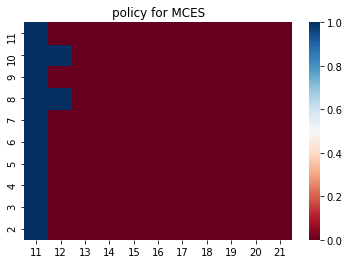

In [182]:
import pandas as pd
policy_df = pd.DataFrame(policy.T,columns=[i for i in  range(11, 22)],index=[i for i in range(2,12)])
import seaborn as sns
ax = sns.heatmap(policy_df, cmap='RdBu')
ax.invert_yaxis()

plt.savefig('MCES.png')
plt.title('policy for MCES')
plt.show()